# Phase 2 Code Challenge

This code challenge is designed to test your understanding of the Phase 2 material. It covers:

- Normal Distribution
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and to answer short answer questions.

## Code Tests

We have provided some code tests for you to run to check that your work meets the item specifications. Passing these tests does not necessarily mean that you have gotten the item correct - there are additional hidden tests. However, if any of the tests do not pass, this tells you that your code is incorrect and needs changes to meet the specification. To determine what the issue is, read the comments in the code test cells, the error message you receive, and the item instructions.

## Short Answer Questions 

For the short answer questions...

* _Use your own words_. It is OK to refer to outside resources when crafting your response, but _do not copy text from another source_.

* _Communicate clearly_. We are not grading your writing skills, but you can only receive full credit if your teacher is able to fully understand your response. 

* _Be concise_. You should be able to answer most short answer questions in a sentence or two. Writing unnecessarily long answers increases the risk of you being unclear or saying something incorrect.

In [1]:
# Run this cell without changes to import the necessary libraries

import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pickle

---
## Part 1: Normal Distribution [Suggested time: 20 minutes]
---
In this part, you will analyze check totals at a TexMex restaurant. We know that the population distribution of check totals for the TexMex restaurant is normally distributed with a mean of \\$20 and a standard deviation of \\$3. 

### 1.1) Create a numeric variable `z_score_26` containing the z-score for a \\$26 check. 

In [2]:
# CodeGrade step1.1
# Replace None with appropriate code
# (x - mu) / std

z_score_26 = (26 - 20) / 3
z_score_26

2.0

In [3]:
# This test confirms that you have created a numeric variable named z_score_26

assert isinstance(z_score_26, Number)

### 1.2) Create a numeric variable `p_under_26` containing the approximate proportion of all checks that are less than \\$26.

Hint: Use the answer from the previous question along with the empirical rule, a Python function, or this [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

In [5]:
# CodeGrade step1.2
# Replace None with appropriate code

p_under_26 = stats.norm(loc=20, scale=3).cdf(26)
p_under_26

0.9772498680518208

In [6]:
# This test confirms that you have created a numeric variable named p_under_26

assert isinstance(p_under_26, Number)

# These tests confirm that p_under_26 is a value between 0 and 1

assert p_under_26 >= 0
assert p_under_26 <= 1

### 1.3) Create numeric variables `conf_low` and `conf_high` containing the lower and upper bounds (respectively) of a 95% confidence interval for the mean of one waiter's check amounts using the information below. 

One week, a waiter gets 100 checks with a mean of \\$19 and a standard deviation of \\$3.

In [8]:
# CodeGrade step1.3
# Replace None with appropriate code

n = 100
mean = 19
std = 3
sterr = std / np.sqrt(n)
z_crit = stats.t.ppf(.975, df=n-1)

conf_low = mean - (z_crit * sterr)
conf_high = mean + (z_crit * sterr)
conf_low, conf_high

(18.404734914547394, 19.595265085452606)

In [7]:
# These tests confirm that you have created numeric variables named conf_low and conf_high

assert isinstance(conf_low, Number)
assert isinstance(conf_high, Number)

# This test confirms that conf_low is below conf_high

assert conf_low < conf_high

# These statements print your answers for reference to help answer the next question

print('The lower bound of the 95% confidence interval is {}'.format(conf_low))
print('The upper bound of the 95% confidence interval is {}'.format(conf_high))

The lower bound of the 95% confidence interval is 18.412
The upper bound of the 95% confidence interval is 19.588


### 1.4) Short Answer: Interpret the 95% confidence interval you just calculated in Question 1.3.

In [9]:
# We are 95% confident that the population mean is between 18.412 and 19.588



---
## Part 2: Statistical Testing [Suggested time: 20 minutes]
---
The TexMex restaurant recently introduced queso to its menu.

We have a random sample containing 2000 check totals, all from different customers: 1000 check totals for orders without queso ("no queso") and 1000 check totals for orders with queso ("queso").

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively.

In [10]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('./no_queso.pkl', 'rb'))
queso = pickle.load(open('./queso.pkl', 'rb'))

### 2.1) Short Answer: State null and alternative hypotheses to use for testing whether customers who order queso spend different amounts of money from customers who do not order queso.

In [ ]:
# Your answer here
#null hypothesis: there is no diffence in amounts of money spent in 
#    customers who order queso and customers who do not order queso

#alternative hypothesis: customers that order queso spend different 
#    amounts of money than customers who do not order queso


### 2.2) Short Answer: What would it mean to make a Type I error for this specific hypothesis test?

Your answer should be _specific to this context,_  not a general statement of what Type I error is.

In [ ]:
# Your answer here
#Type I error = false positve (rejects null that is actually true)
#reject that there is no difference in amounts of money spent in 
#    customers who order queso and customers who do not order queso
#    when in actuality this is true



### 2.3) Create a numeric variable `p_value` containing the p-value associated with a statistical test of your hypotheses. 

You must identify and implement the correct statistical test for this scenario. You can assume the two samples have equal variances.

Hint: Use `scipy.stats` to calculate the answer - it has already been imported as `stats`. Relevant documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [13]:
#no_queso, queso

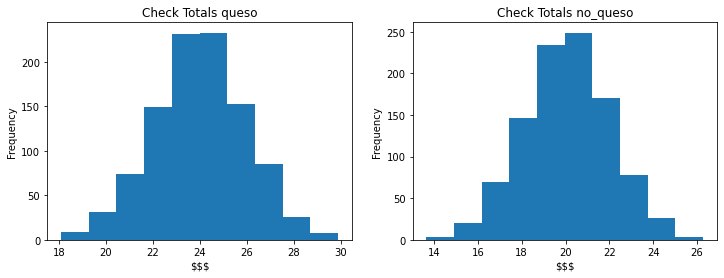

In [15]:
# Plotting histograms for acceleration for both queso and no_queso
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Check Totals queso')
ax1.set_xlabel('$$$')
ax1.set_ylabel('Frequency')
ax1.hist(queso)

ax2.set_title('Check Totals no_queso')
ax2.set_xlabel('$$$')
ax2.set_ylabel('Frequency')
ax2.hist(no_queso)
plt.show()

In [21]:
stats.ttest_ind(queso, no_queso)

Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [25]:
stats.ttest_ind(queso, no_queso)[1]

1.29670967092511e-307

In [26]:
type(stats.ttest_ind(queso, no_queso)[1])

numpy.float64

In [27]:
# CodeGrade step2.3
# Replace None with appropriate code

p_value = stats.ttest_ind(queso, no_queso)[1]

In [28]:
# This test confirms that you have created a numeric variable named p_value

assert isinstance(p_value, Number)

### 2.4) Short Answer: Can you reject the null hypothesis using a significance level of $\alpha$ = 0.05? Explain why or why not.

In [ ]:
# Your answer here
#Yes, reject the null. p_value is much smaller than alpha


---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
A medical test is designed to diagnose a certain disease. The test has a false positive rate of 10%, meaning that 10% of people without the disease will get a positive test result. The test has a false negative rate of 2%, meaning that 2% of people with the disease will get a negative result. Only 1% of the population has this disease.

### 3.1) Create a numeric variable `p_pos_test` containing the probability of a person receiving a positive test result.

Assume that the person being tested is randomly selected from the broader population.

In [30]:
# CodeGrade step3.1
# Replace None with appropriate code
    
false_pos_rate = 0.1
false_neg_rate = 0.02
population_rate = 0.01

p_pos_test = (0.99)*(0.1) + (0.01)*(0.98)
p_pos_test

0.10880000000000001

In [31]:
# This test confirms that you have created a numeric variable named p_pos_test

assert isinstance(p_pos_test, Number)

# These tests confirm that p_pos_test is a value between 0 and 1

assert p_pos_test >= 0
assert p_pos_test <= 1

### 3.2) Create a numeric variable `p_disease_given_pos` containing the probability of a person actually having the disease if they receive a positive test result.

Assume that the person being tested is randomly selected from the broader population.

Hint: Use your answer to the previous question to help answer this one.

In [33]:
# CodeGrade step3.2
# Replace None with appropriate code
    
false_pos_rate = 0.1
false_neg_rate = 0.02
population_rate = 0.01

p_disease_given_pos = ((.98)*(.01)) / p_pos_test
p_disease_given_pos

0.09007352941176469

In [34]:
# This test confirms that you have created a numeric variable named p_disease_given_pos

assert isinstance(p_disease_given_pos, Number)

# These tests confirm that p_disease_given_pos is a value between 0 and 1

assert p_disease_given_pos >= 0
assert p_disease_given_pos <= 1

---

## Part 4: Linear Regression [Suggested Time: 20 min]
---

In this section, you'll run regression models with [automobile price](https://archive.ics.uci.edu/ml/datasets/Automobile) data.

We will use these columns of the dataset:

- `body-style`: categorical, hardtop, wagon, sedan, hatchback, or convertible
- `length`: continuous
- `width`: continuous
- `height`: continuous
- `engine-size`: continuous
- `price`: continuous

We will use `price` as the target and all other columns as features. The units of `price` are US dollars in 1985.

In [43]:
# Run this cell without changes

# Load data into pandas
data = pd.read_csv("automobiles.csv")

# Data cleaning
data = data[(data["horsepower"] != "?") & (data["price"] != "?")]
data["horsepower"] = data["horsepower"].astype(int)
data["price"] = data["price"].astype(int)

# Select subset of columns
data = data[["body-style", "length", "width", "height", "engine-size", "horsepower", "city-mpg", "price"]]
data

,body-style,length,width,height,engine-size,horsepower,city-mpg,price
0,convertible,168.8,64.1,48.8,130,111,21,13495
1,convertible,168.8,64.1,48.8,130,111,21,16500
2,hatchback,171.2,65.5,52.4,152,154,19,16500
3,sedan,176.6,66.2,54.3,109,102,24,13950
4,sedan,176.6,66.4,54.3,136,115,18,17450
...,...,...,...,...,...,...,...,...
200,sedan,188.8,68.9,55.5,141,114,23,16845
201,sedan,188.8,68.8,55.5,141,160,19,19045
202,sedan,188.8,68.9,55.5,173,134,18,21485
203,sedan,188.8,68.9,55.5,145,106,26,22470


### 4.1) Build a StatsModels `OLS` model `numeric_mod` that uses all numeric features to predict `price`

In other words, this model should use all features in `data` except for `body-style` (because `body-style` is categorical).

In [47]:
# CodeGrade step4.1
# Replace None with appropriate code
    
y = data.price
X = data[['length', 'width', 'height', 'engine-size', 'horsepower', 'city-mpg']]

numeric_mod = sm.OLS(y, sm.add_constant(X))

In [48]:
# This test confirms that you have created a variable named numeric_mod containing a StatsModels OLS model

assert type(numeric_mod) == sm.OLS

In [49]:
# This code prints your model summary for reference to help answer the next question

numeric_results = numeric_mod.fit()
print(numeric_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     146.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           8.43e-69
Time:                        12:40:08   Log-Likelihood:                -1899.0
No. Observations:                 199   AIC:                             3812.
Df Residuals:                     192   BIC:                             3835.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -7.07e+04   1.36e+04     -5.197      

In [50]:
numeric_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     146.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           8.43e-69
Time:                        12:40:39   Log-Likelihood:                -1899.0
No. Observations:                 199   AIC:                             3812.
Df Residuals:                     192   BIC:                             3835.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -7.07e+04   1.36e+04     -5.197      0.000   -9.75e+04   -4.39e+04
length        -46.3698     50.107     -0.925      0.356    -145.200      52.461
width         908.5449    244.437      3.717      0.000     426.419    1390.671
height        273.9268    137.282      1.995      0.047       3.153     544.701
engine-size    92.5917     12.613      7.341      0.000      67.713     117.470
horsepower     62.2932     16.544      3.765      0.000      29.662      94.924
city-mpg      -29.8524     77.298     -0.386      0.700    -182.314     122.609
==============================================================================
Omnibus:                       22.902   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.916
Skew:                           0.582   Prob(JB):                     4.80e-10
Kurtosis:                       4.955   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.2) Short Answer: Are all of these features statististically significant? If not, which features are not? How did you determine this from the model output?

Include the alpha level you are using in your answer.

In [ ]:
# Your answer here
'''
All features are statistically significant EXCEPT length and city-mpg
given an alpha of .05
'''

### 4.3) Short Answer: Let's say we want to add `body-style` to our model. Run the cell below to view the values of `body-style`. Given the output, how many one-hot encoded features should be added?

Explain your answer. ***Hint:*** you might want to mention the dummy variable trap and/or the reference category.

In [51]:
# Run this cell without changes

data["body-style"].value_counts().sort_index()

convertible     6
hardtop         8
hatchback      67
sedan          94
wagon          24
Name: body-style, dtype: int64

In [ ]:
# Your answer here

'''
4 one-hot encoded features should be added. we drop one to avoid
the dummy variable trap which helps to avoid introducing multicolinearity
'''

### 4.4) Prepare `body-style` for modeling using `pd.get_dummies`. Then create a StatsModels `OLS` model `all_mod` that predicts `price` using all (including one-hot encoded) other features.

In [54]:
body_style = data['body-style']
body_gd = pd.get_dummies(body_style, drop_first=True)

In [56]:
X_all = X, body_gd
df_X_all = pd.concat(X_all)

In [58]:
# CodeGrade step4.4
# Replace None with appropriate code
    
X_ohe = df_X_all

all_mod = sm.OLS(y, sm.add_constant(X_ohe))

MissingDataError: exog contains inf or nans

In [27]:
# This test confirms that you have created a variable named all_mod containing a StatsModels OLS model

assert type(all_mod) == sm.OLS

# This code prints your model summary for reference to help answer the next question

all_results = all_mod.fit()
print(all_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     98.92
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           2.34e-69
Time:                        09:14:21   Log-Likelihood:                -1887.3
No. Observations:                 199   AIC:                             3797.
Df Residuals:                     188   BIC:                             3833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.519e+04 

### 4.5) Short Answer: Does this model do a better job of explaining automobile price than the previous model using only numeric features? Explain how you determined this based on the model output. 

In [59]:
# Your answer here
If the R^2 is higher, it would be better.


SyntaxError: invalid syntax (<ipython-input-59-6bfd5b87b584>, line 2)